# The Oscars

## Great stories and great visual effects

__Dataset__: Data set contains the product demands for encoded products 
<br>
Source: https://www.kaggle.com/felixzhao/productdemandforecasting

Formulating ideas on how storytelling and visualization would help describe the data set and establish additional value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
warnings.filterwarnings("ignore") # specify to ignore warning messages

## Data Extraction and Feature Engineering

In [2]:
demand = pd.read_csv('../data/external/Historical Product Demand.csv', low_memory=False)
list(demand)

['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand']

In [3]:
demand.head(3)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,7/27/12,100
1,Product_0979,Whse_J,Category_028,1/19/12,500
2,Product_0979,Whse_J,Category_028,2/3/12,500


In [4]:
demand.Product_Code.unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [5]:
demand.drop(demand[demand.Date.isnull()].index, inplace=True)

In [6]:
demand.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand         int64
dtype: object

Text(0.5,1,'Product_1359 Sales')

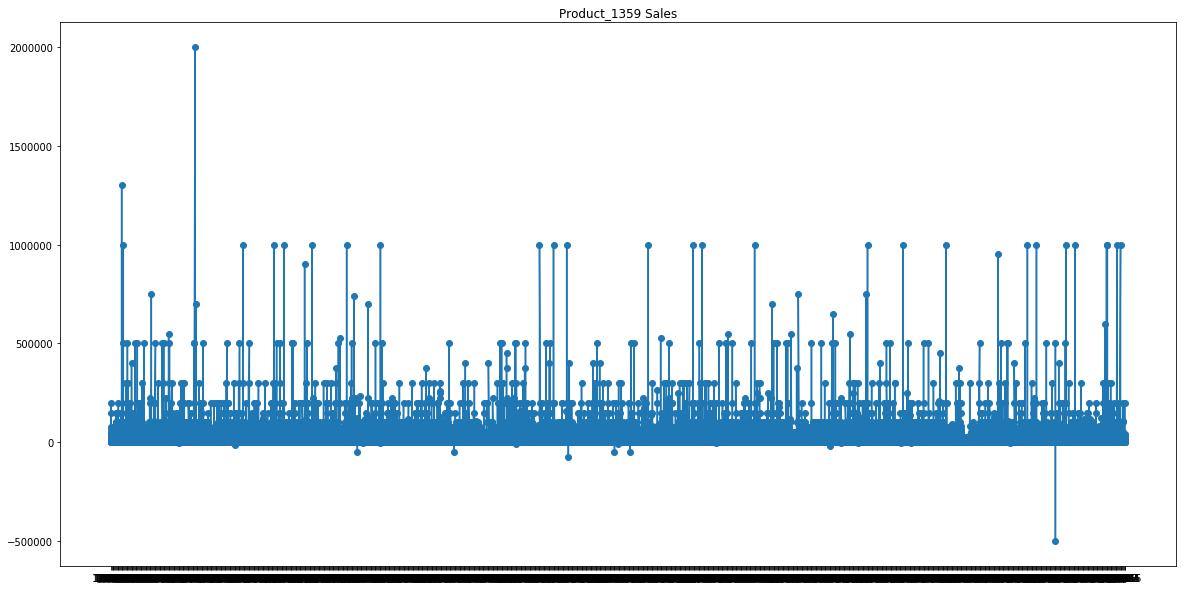

In [7]:
plt.figure(1,figsize=(20,10)) 
demand=demand.sort_values(by='Date')
plt.plot_date(demand.loc[demand.Product_Code=='Product_1359','Date'],demand.loc[demand.Product_Code=='Product_1359','Order_Demand'],linestyle='-') 
plt.title('Product_1359 Sales')

In [8]:
product = demand.loc[demand['Product_Code'] == 'Product_1359']

In [9]:
# 1. Extracting year
product['year'] = pd.DatetimeIndex(product['Date']).year
# 2. Extracting month
product['month'] = pd.DatetimeIndex(product['Date']).month
# 3. Extracting day
product['day'] = pd.DatetimeIndex(product['Date']).day
# 4. Extracting quarter
product['quarter'] = pd.DatetimeIndex(product['Date']).quarter
# 5. Extracting Day of Week
product['dow'] = product.apply(lambda row: pd.Timestamp(row.Date).dayofweek, axis=1)

In [14]:
product.head(3)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,year,month,day,quarter,dow
85330,Product_1359,Whse_J,Category_019,1/10/12,50000,2012,1,10,1,1
180527,Product_1359,Whse_J,Category_019,1/10/12,2000,2012,1,10,1,1
141213,Product_1359,Whse_J,Category_019,1/10/12,1000,2012,1,10,1,1


In [15]:
product = product.drop(
    columns=[
        'Product_Code', 'Product_Category', 'Warehouse'
    ]
)

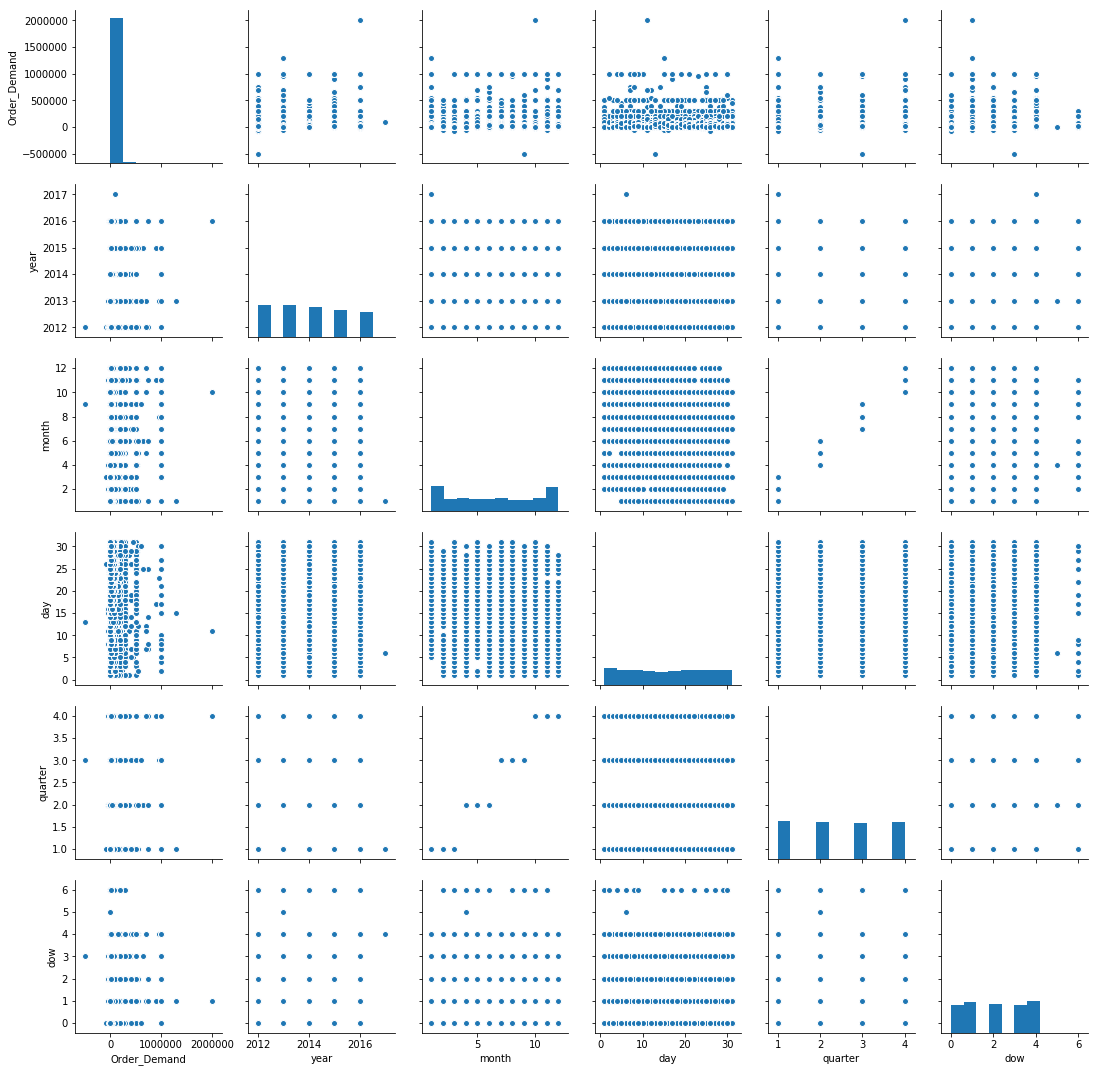

In [16]:
sns.pairplot(product[list(product.columns)])

In [17]:
productnew = product.copy()

In [18]:
productnew.head(3)

,Date,Order_Demand,year,month,day,quarter,dow
85330,1/10/12,50000,2012,1,10,1,1
180527,1/10/12,2000,2012,1,10,1,1
141213,1/10/12,1000,2012,1,10,1,1


In [19]:
productnew['Date'] = pd.to_datetime(productnew['Date'])
productnew = productnew.set_index('Date')
productnew = productnew.apply(pd.to_numeric, errors='ignore')
productnew = productnew.infer_objects()
productnew.Order_Demand = productnew.Order_Demand.astype(float)

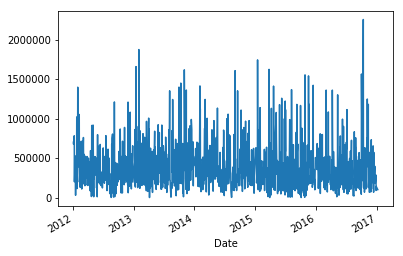

In [20]:
productnew.groupby(level=0).Order_Demand.sum().plot()

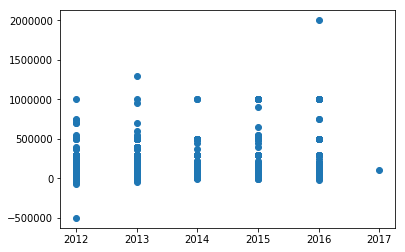

In [21]:
plt.scatter(productnew['year'], productnew['Order_Demand'] )
plt.show() 

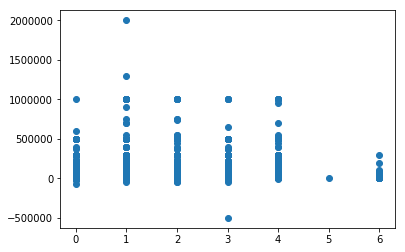

In [22]:
plt.scatter(productnew['dow'], productnew['Order_Demand'] )
plt.show() 

In [23]:
y = productnew['Order_Demand'].resample('MS').mean()

In [24]:
y.head()

Date
2012-01-01    28554.487179
2012-02-01    22566.197183
2012-03-01    23902.821317
2012-04-01    26467.065868
2012-05-01    26238.390093
Freq: MS, Name: Order_Demand, dtype: float64

In [25]:
y.dtypes

dtype('float64')

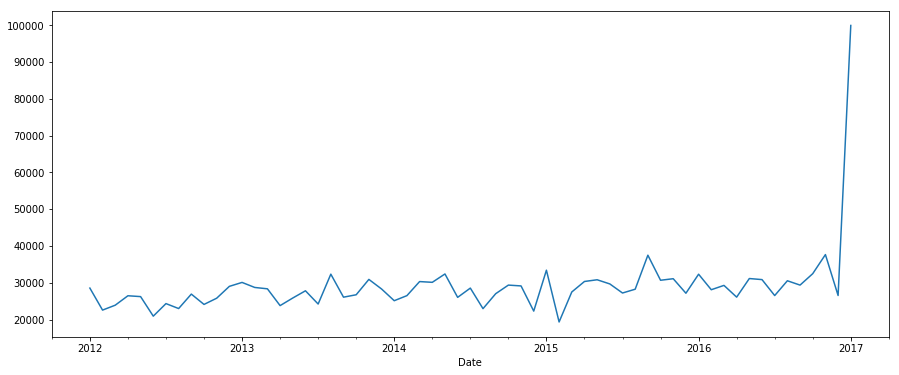

In [26]:
y.plot(figsize=(15, 6))
plt.show()

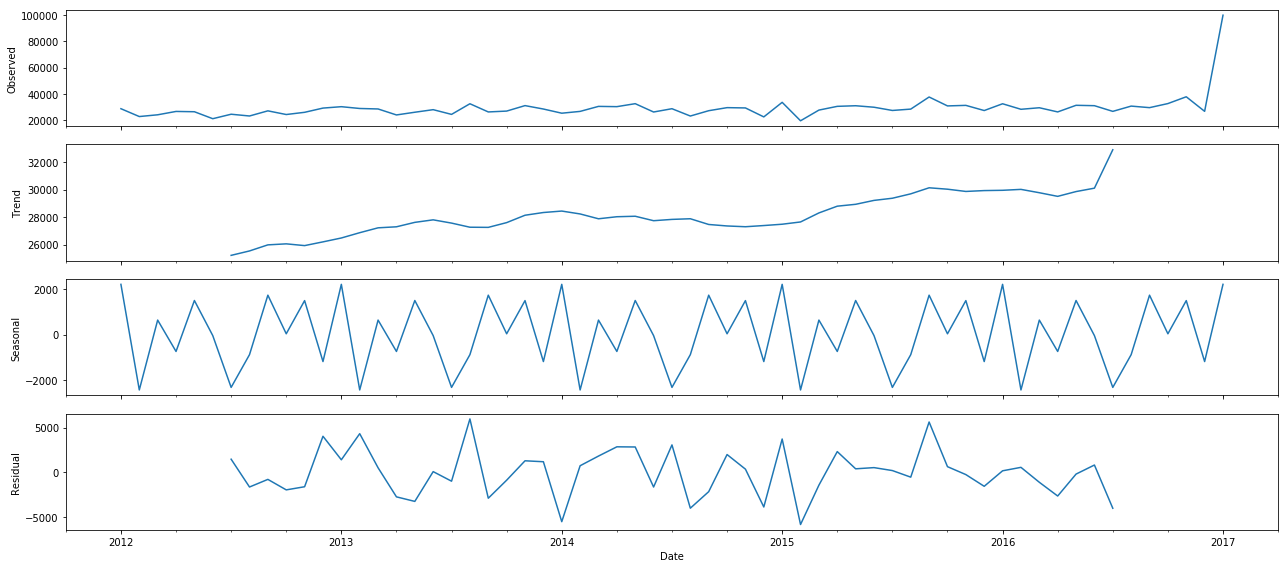

In [27]:

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()